Optimal value: 2


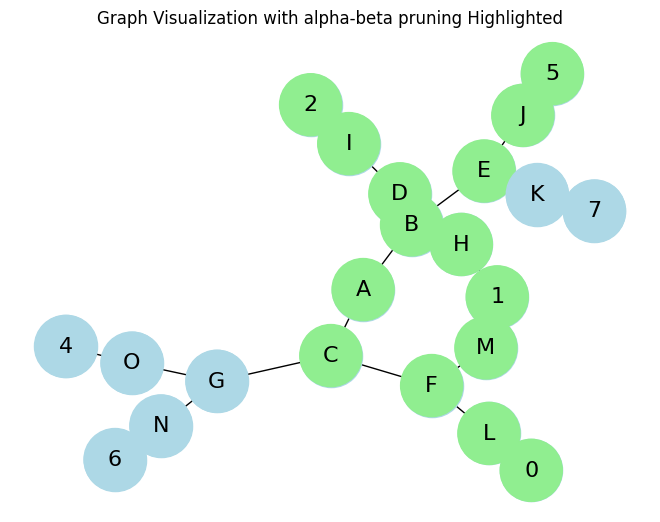

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

# Define constants for minimum and maximum values
MIN = float('-inf')
MAX = float('inf')

visited_nodes = []  # List to keep track of visited nodes

def alphabeta(node, graph, isMaximizing, alpha=MIN, beta=MAX):
    global visited_nodes  # Use the global variable to track visited nodes
    visited_nodes.append(node)  # Track the current node

    # Check if the node is a terminal node (leaf)
    if str(node).isdigit():
        return node  # Return the value of the node if it's a leaf

    # Initialize the optimal value based on whether we are maximizing or minimizing
    if isMaximizing:
        optimal_value = MIN  # Start with the lowest possible value
        for child in graph[node]:  # Iterate through child nodes
            # Recursively call alphabeta for the child node
            val = alphabeta(child, graph, False, alpha, beta)
            optimal_value = max(optimal_value, val)  # Update optimal value
            alpha = max(alpha, optimal_value)  # Update alpha value
            if alpha >= beta:  # Beta cut-off
                break  # Stop searching if we found a better option
    else:
        optimal_value = MAX  # Start with the highest possible value
        for child in graph[node]:  # Iterate through child nodes
            # Recursively call alphabeta for the child node
            val = alphabeta(child, graph, True, alpha, beta)
            optimal_value = min(optimal_value, val)  # Update optimal value
            beta = min(beta, optimal_value)  # Update beta value
            if alpha >= beta:  # Alpha cut-off
                break  # Stop searching if we found a better option

    return optimal_value  # Return the optimal value found

# Define the game tree structure
Graph_nodes = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F', 'G'],
    'D': ['H', 'I'],
    'E': ['J', 'K'],
    'F': ['L', 'M'],
    'G': ['N', 'O'],
    'H': [1], 
    'I': [2],
    'J': [5],
    'K': [7],
    'L': [0],
    'M': [1],
    'N': [6],
    'O': [4]
}

# Call the alphabeta function starting from node 'A'
result = alphabeta('A', Graph_nodes, True)
print("Optimal value:", result)  # Print the optimal value found

def draw_graph(visited_nodes):
    G = nx.Graph()
    for node, edges in Graph_nodes.items():
        for neighbor in edges:
            G.add_edge(node, neighbor)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=16)
    visited_color = ['lightgreen' if node in visited_nodes else 'lightblue' for node in G.nodes()]
    nx.draw_networkx_nodes(G, pos, node_color=visited_color, node_size=2000)
    plt.title("Graph Visualization with alpha-beta pruning Highlighted")
    plt.show()

draw_graph(visited_nodes)